Question 01

In [7]:
import pandas as pd

data = pd.read_csv(r'E:\AICP\Internship\Week 6\Assets\births.csv')

print(data.columns)

data['year'] = pd.to_datetime(data['year']).dt.year

data['Decade'] = (data['year'] // 10) * 10

print(data.head())


Index(['year', 'month', 'day', 'gender', 'births'], dtype='object')
   year  month  day gender  births  Decade
0  1970      1  1.0      F    4046    1970
1  1970      1  1.0      M    4440    1970
2  1970      1  2.0      F    4454    1970
3  1970      1  2.0      M    4548    1970
4  1970      1  3.0      F    4548    1970


Question 02

In [8]:
import pandas as pd

data = pd.read_csv(r'E:\AICP\Internship\Week 6\Assets\births.csv')

statistics = data.describe()

print(statistics)


               year         month           day         births
count  15547.000000  15547.000000  15067.000000   15547.000000
mean    1979.037435      6.515919     17.769894    9762.293561
std        6.728340      3.449632     15.284034   28552.465810
min     1969.000000      1.000000      1.000000       1.000000
25%     1974.000000      4.000000      8.000000    4358.000000
50%     1979.000000      7.000000     16.000000    4814.000000
75%     1984.000000     10.000000     24.000000    5289.500000
max     2008.000000     12.000000     99.000000  199622.000000


Question 03

In [9]:
import pandas as pd

data = pd.read_csv(r'E:\AICP\Internship\Week 6\Assets\births.csv')

missing_values = data.isna().sum()

print("Missing values in each column:")
print(missing_values)


Missing values in each column:
year        0
month       0
day       480
gender      0
births      0
dtype: int64


Question 04

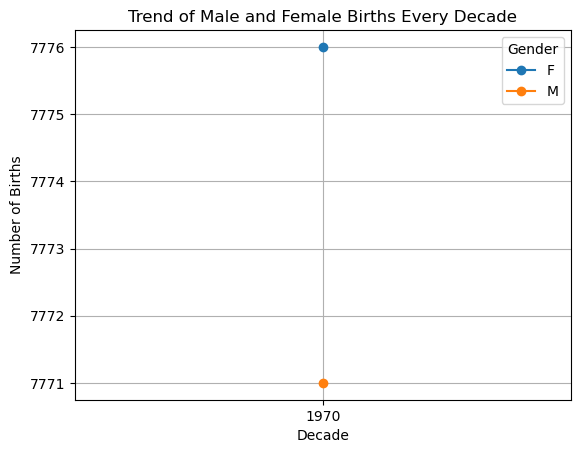

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv(r'E:\AICP\Internship\Week 6\Assets\births.csv')

data['year'] = pd.to_datetime(data['year']).dt.year

data['Decade'] = (data['year'] // 10) * 10

births_by_decade_gender = data.groupby(['Decade', 'gender']).size().unstack(fill_value=0)

births_by_decade_gender.plot(kind='line', marker='o')
plt.title('Trend of Male and Female Births Every Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Births')
plt.xticks(births_by_decade_gender.index)
plt.legend(title='Gender')
plt.grid(True)
plt.show()


Question 05

In [14]:
import pandas as pd

data = pd.read_csv(r'E:\AICP\Internship\Week 6\Assets\births.csv')

mean = data['births'].mean()
std_dev = data['births'].std()

lower_bound = mean - 5 * std_dev
upper_bound = mean + 5 * std_dev

filtered_data = data[(data['births'] >= lower_bound) & (data['births'] <= upper_bound)]

print("Original data shape:", data.shape)
print("Filtered data shape:", filtered_data.shape)


Original data shape: (15547, 5)
Filtered data shape: (15086, 5)


Question 06

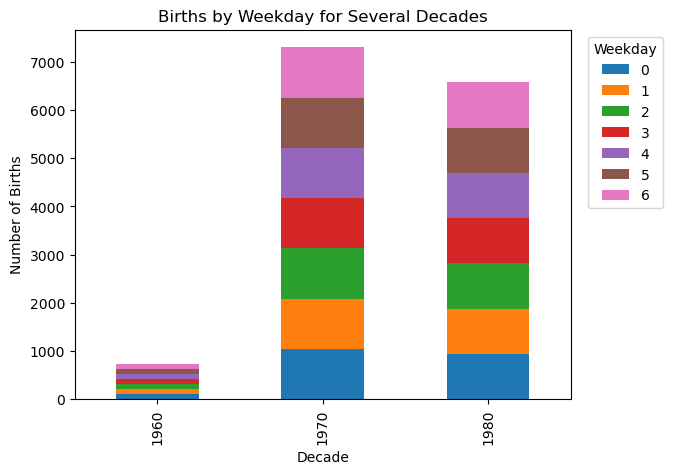

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv(r'E:\AICP\Internship\Week 6\Assets\births.csv')

data['day'] = pd.to_datetime(data[['year', 'month', 'day']], errors='coerce', dayfirst=True)

data.dropna(subset=['day'], inplace=True)

data['weekday'] = data['day'].dt.weekday

data['decade'] = (data['year'] // 10) * 10

births_by_weekday_decade = data.groupby(['decade', 'weekday']).size().unstack(fill_value=0)

births_by_weekday_decade.plot(kind='bar', stacked=True)
plt.title('Births by Weekday for Several Decades')
plt.xlabel('Decade')
plt.ylabel('Number of Births')
plt.xticks(range(len(births_by_weekday_decade.index)), births_by_weekday_decade.index)
plt.legend(title='Weekday', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()


Question 07

In [19]:
import pandas as pd


births_by_month = data.groupby('month')['births'].sum()

births_by_day = data.groupby('day')['births'].sum()

print("Births by Month:")
print(births_by_month)

print("\nBirths by Day:")
print(births_by_day)


Births by Month:
month
1     5759165
2     5362585
3     5868140
4     5560775
5     5785220
6     5758571
7     6220295
8     6309764
9     6205972
10    6055372
11    5695273
12    5904376
Name: births, dtype: int64

Births by Day:
day
1969-01-01     8486
1969-01-02     9002
1969-01-03     9542
1969-01-04     8960
1969-01-05     8390
              ...  
1988-12-27    11528
1988-12-28    11847
1988-12-29    11704
1988-12-30    11837
1988-12-31     9133
Name: births, Length: 7305, dtype: int64


Question 08

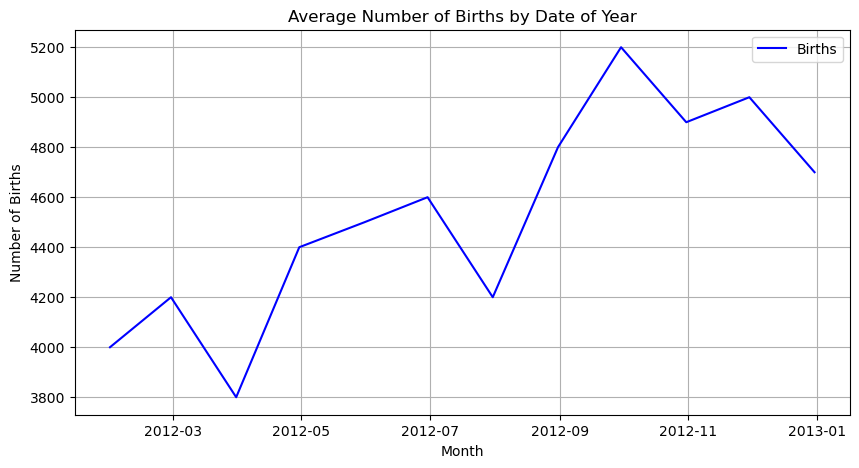

In [22]:
import matplotlib.pyplot as plt
import pandas as pd

data = {
    'Date': pd.date_range(start='1/1/2012', periods=12, freq='M'),
    'Births': [4000, 4200, 3800, 4400, 4500, 4600, 4200, 4800, 5200, 4900, 5000, 4700]
}
df = pd.DataFrame(data)

plt.figure(figsize=(10, 5))
plt.plot(df['Date'], df['Births'], label='Births', color='blue')

plt.title('Average Number of Births by Date of Year')
plt.xlabel('Month')
plt.ylabel('Number of Births')
plt.legend()
plt.grid(True)
plt.show()
